In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/mitsui_project/mitsui_project/data/'
train_df = pd.read_csv(f'{file_path}train.csv')
train_labels_df = pd.read_csv(f'{file_path}train_labels.csv')
target_pairs_df = pd.read_csv(f'{file_path}target_pairs.csv')
test_df = pd.read_csv(f'{file_path}test.csv')

Mounted at /content/drive


In [4]:
train_df.head()

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503


In [5]:
train_labels_df.head()

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,NaN,NaN,-0.012519,-0.016896,NaN,...,NaN,0.036880,-0.015189,NaN,0.008118,0.001079,NaN,-0.015102,NaN,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,NaN,0.004937,NaN,-0.006673,-0.016105,-0.004885,NaN,NaN,0.009514,NaN


In [6]:
target_pairs_df.head()

,target,lag,pair
0,target_0,1,US_Stock_VT_adj_close
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close


In [7]:
test_df.head()

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP,is_scored
0,1827,2684.5,9190.0,1967.0,2942.0,13623.0,13920.0,13618.0,4696.0,4692.0,...,0.631633,0.808485,0.510666,0.051733,0.071654,0.079797,0.048828,13.631347,0.043845,True
1,1828,2691.5,9275.0,1985.0,2963.5,13640.0,13922.0,13634.0,4613.0,4613.0,...,0.633526,0.812571,0.514785,0.051802,0.071793,0.080214,0.048912,13.743387,0.043778,True
2,1829,2646.0,9284.5,1971.0,2914.0,13634.0,13923.0,13638.0,4647.0,4632.0,...,0.632156,0.811948,0.513278,0.051902,0.071630,0.080134,0.048971,13.766241,0.043774,True
3,1830,2634.0,9223.5,1967.0,2900.0,13681.5,13962.0,13680.0,4630.0,4631.0,...,0.629661,0.815155,0.513271,0.051907,0.071972,0.080325,0.048968,13.864629,0.043876,True
4,1831,2623.5,9232.0,1949.0,2846.5,13849.5,14141.0,13844.0,4699.5,4703.0,...,0.630969,0.816284,0.515051,0.051867,0.071790,0.080475,0.049027,13.847691,0.043736,True


In [8]:
for name, df in {
    "train": train_df,
    "test": test_df,
    "train_labels": train_labels_df,
    "target_pairs": target_pairs_df,
}.items():
  print(f'{name}: shape={df.shape}')
  assert "date_id" in df.columns or name == "target_pairs", f"{name} missing date_id"
  if(name!="target_pairs"):
      df.sort_values("date_id", inplace=True)
      df.reset_index(drop=True, inplace=True)

display(train_df.head(3))
display(train_labels_df.head(3))
display(target_pairs_df.head(3))
display(test_df.head(3))

print("train date_id range:", train_df["date_id"].min(), "→", train_df["date_id"].max())
print("labels date_id range:", train_labels_df["date_id"].min(), "→", train_labels_df["date_id"].max())
print("test date_id range:", test_df["date_id"].min(), "→", test_df["date_id"].max())

train: shape=(1917, 558)
test: shape=(90, 559)
train_labels: shape=(1917, 425)
target_pairs: shape=(424, 3)


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037


,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706


,target,lag,pair
0,target_0,1,US_Stock_VT_adj_close
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP,is_scored
0,1827,2684.5,9190.0,1967.0,2942.0,13623.0,13920.0,13618.0,4696.0,4692.0,...,0.631633,0.808485,0.510666,0.051733,0.071654,0.079797,0.048828,13.631347,0.043845,True
1,1828,2691.5,9275.0,1985.0,2963.5,13640.0,13922.0,13634.0,4613.0,4613.0,...,0.633526,0.812571,0.514785,0.051802,0.071793,0.080214,0.048912,13.743387,0.043778,True
2,1829,2646.0,9284.5,1971.0,2914.0,13634.0,13923.0,13638.0,4647.0,4632.0,...,0.632156,0.811948,0.513278,0.051902,0.071630,0.080134,0.048971,13.766241,0.043774,True


train date_id range: 0 → 1916
labels date_id range: 0 → 1916
test date_id range: 1827 → 1916


,0
US_Stock_GOLD_adj_volume,0.870631
US_Stock_GOLD_adj_open,0.870631
US_Stock_GOLD_adj_close,0.870631
US_Stock_GOLD_adj_low,0.870631
US_Stock_GOLD_adj_high,0.870631
JPX_RSS3_Rubber_Futures_High,0.059990
JPX_Gold_Rolling-Spot_Futures_Low,0.059990
JPX_Gold_Standard_Futures_Low,0.059990
JPX_Platinum_Mini_Futures_Low,0.059990
JPX_Gold_Standard_Futures_Volume,0.059990


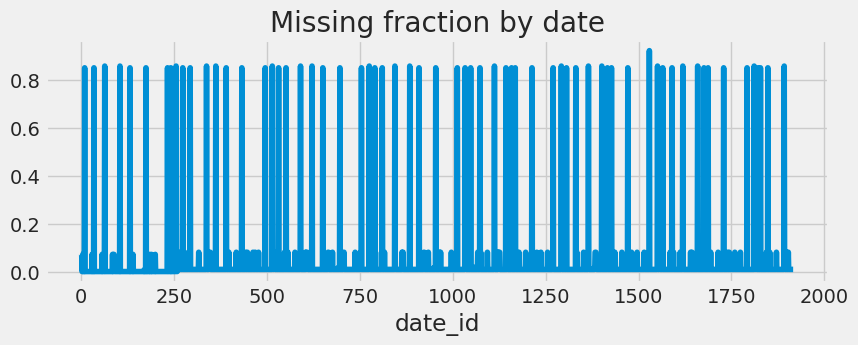

In [9]:
na_col = train_df.isna().mean().sort_values(ascending=False)
display(na_col.head(20))

na_by_date =train_df.isna().mean(axis=1)
na_by_date.index = train_df["date_id"]
na_by_date.plot(figsize=(9,3), title="Missing fraction by date")
plt.show()

In [10]:
def prefix(col):
    for p in ("LME_", "JPX_", "US_", "FX_"):
        if col.startswith(p):
            return p
    return "OTHER"

cols = [c for c in train_df.columns if c != "date_id"]
by_prefix = pd.Series([prefix(c) for c in cols]).value_counts()
print(by_prefix)

US_     475
JPX_     40
FX_      38
LME_      4
Name: count, dtype: int64


In [11]:
cols = train_df.columns.tolist()
print(cols)

['date_id', 'LME_AH_Close', 'LME_CA_Close', 'LME_PB_Close', 'LME_ZS_Close', 'JPX_Gold_Mini_Futures_Open', 'JPX_Gold_Rolling-Spot_Futures_Open', 'JPX_Gold_Standard_Futures_Open', 'JPX_Platinum_Mini_Futures_Open', 'JPX_Platinum_Standard_Futures_Open', 'JPX_RSS3_Rubber_Futures_Open', 'JPX_Gold_Mini_Futures_High', 'JPX_Gold_Rolling-Spot_Futures_High', 'JPX_Gold_Standard_Futures_High', 'JPX_Platinum_Mini_Futures_High', 'JPX_Platinum_Standard_Futures_High', 'JPX_RSS3_Rubber_Futures_High', 'JPX_Gold_Mini_Futures_Low', 'JPX_Gold_Rolling-Spot_Futures_Low', 'JPX_Gold_Standard_Futures_Low', 'JPX_Platinum_Mini_Futures_Low', 'JPX_Platinum_Standard_Futures_Low', 'JPX_RSS3_Rubber_Futures_Low', 'JPX_Gold_Mini_Futures_Close', 'JPX_Gold_Rolling-Spot_Futures_Close', 'JPX_Gold_Standard_Futures_Close', 'JPX_Platinum_Mini_Futures_Close', 'JPX_Platinum_Standard_Futures_Close', 'JPX_RSS3_Rubber_Futures_Close', 'JPX_Gold_Mini_Futures_Volume', 'JPX_Gold_Rolling-Spot_Futures_Volume', 'JPX_Gold_Standard_Futures_V

In [12]:
import re

cols = train_df.columns

# Keep only columns that look like prices (exclude volume, open_interest)
price_like = [
    c for c in cols
    if re.search(r"(Close|close|Open|open|High|high|Low|low|Price|price|^FX_)", c)
    and not re.search(r"(Volume|volume|open_interest)", c)
]

print("price-like columns:", len(price_like))
print(price_like[:20])  # show first 20 for sanity check

# Spot extreme 1-day simple returns (to catch bad columns)
def simple_ret(s):
    return s.pct_change()

stats = []
for c in price_like[:200]:  # cap for speed if many cols
    s = train_df[c]
    if s.isna().all():
        continue
    r = simple_ret(s)
    stats.append((c, r.abs().quantile(0.99), r.abs().median()))
ret_stats = pd.DataFrame(stats, columns=["col","p99_abs_ret","median_abs_ret"]).sort_values("p99_abs_ret", ascending=False)
display(ret_stats.head(15))


price-like columns: 450
['LME_AH_Close', 'LME_CA_Close', 'LME_PB_Close', 'LME_ZS_Close', 'JPX_Gold_Mini_Futures_Open', 'JPX_Gold_Rolling-Spot_Futures_Open', 'JPX_Gold_Standard_Futures_Open', 'JPX_Platinum_Mini_Futures_Open', 'JPX_Platinum_Standard_Futures_Open', 'JPX_RSS3_Rubber_Futures_Open', 'JPX_Gold_Mini_Futures_High', 'JPX_Gold_Rolling-Spot_Futures_High', 'JPX_Gold_Standard_Futures_High', 'JPX_Platinum_Mini_Futures_High', 'JPX_Platinum_Standard_Futures_High', 'JPX_RSS3_Rubber_Futures_High', 'JPX_Gold_Mini_Futures_Low', 'JPX_Gold_Rolling-Spot_Futures_Low', 'JPX_Gold_Standard_Futures_Low', 'JPX_Platinum_Mini_Futures_Low']


/tmp/ipython-input-376661745.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return s.pct_change()
/tmp/ipython-input-376661745.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return s.pct_change()
/tmp/ipython-input-376661745.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return s.pct_change()
/tmp/ipython-input-376661745.py:17: FutureWarning: The default fill_method='pad' in Series.

,col,p99_abs_ret,median_abs_ret
126,US_Stock_YINN_adj_open,0.167647,0.028486
85,US_Stock_NUGT_adj_open,0.150813,0.026064
180,US_Stock_NUGT_adj_high,0.132086,0.022758
122,US_Stock_X_adj_open,0.125410,0.017000
183,US_Stock_OXY_adj_high,0.119919,0.011700
105,US_Stock_TRGP_adj_open,0.119394,0.013557
70,US_Stock_HL_adj_open,0.117967,0.021385
46,US_Stock_CLF_adj_open,0.117597,0.019944
34,US_Stock_AG_adj_open,0.115464,0.020768
87,US_Stock_OKE_adj_open,0.115049,0.010325


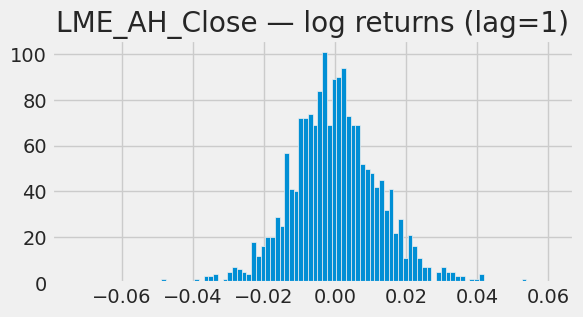

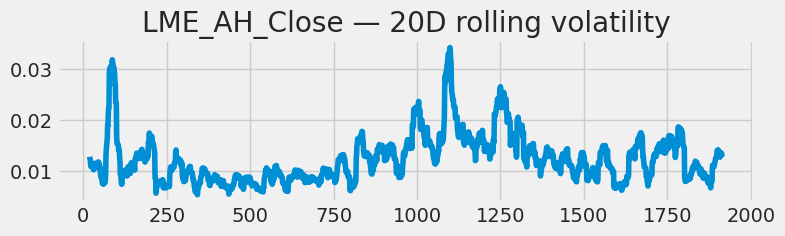

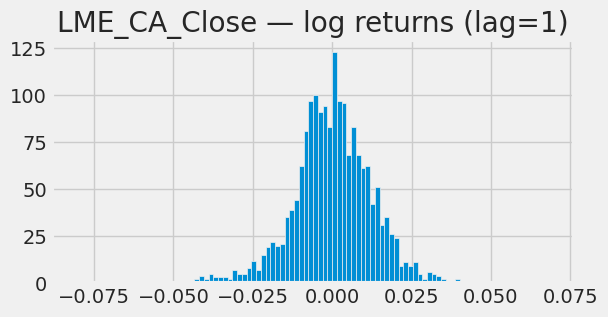

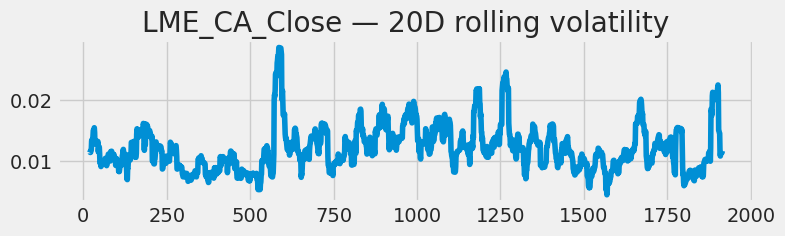

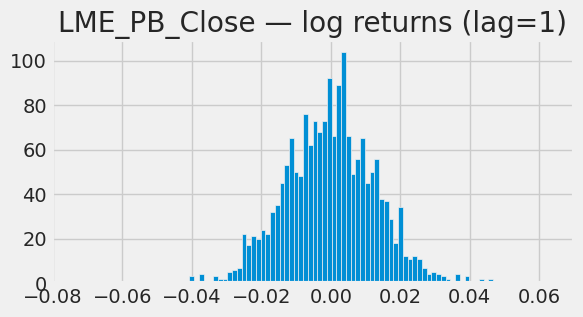

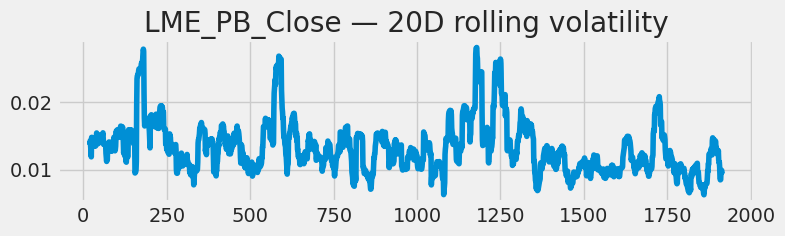

In [13]:
def log_ret(series, lag=1):
    # Align like ln(P_{t+lag}/P_t)
    return np.log(series.shift(-lag) / series)

pick = [c for c in price_like if "LME_" in c][:3]  # e.g., first few LME series
for c in pick:
    r = log_ret(train_df[c], lag=1).dropna()
    ax = r.hist(bins=100, figsize=(6,3))
    plt.title(f"{c} — log returns (lag=1)")
    plt.show()
    # Rolling volatility (20-day)
    r.rolling(20).std().plot(figsize=(8,2), title=f"{c} — 20D rolling volatility")
    plt.show()


In [14]:
import warnings, re

def generate_log_returns(data: pd.Series, lag: int) -> pd.Series:
    # Replicates competition logic
    out = pd.Series(np.nan, index=data.index)
    for t in range(len(data)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            try:
                out.iloc[t] = np.log(data.iloc[t + lag + 1] / data.iloc[t + 1])
            except Exception:
                out.iloc[t] = np.nan
    return out

def generate_targets(a: pd.Series, b: pd.Series, lag: int) -> pd.Series:
    a_r = generate_log_returns(a, lag)
    b_r = generate_log_returns(b, lag)
    return a_r - b_r

# Choose one target from target_pairs
row = target_pairs_df.sample(1, random_state=0).iloc[0]
tgt_name, lag = row["target"], int(row["lag"])
pair = row["pair"]

# Split the pair; handle single or A–B
parts = re.split(r"\s*[–-]\s*", pair.strip())
series_a = train_df[parts[0]]
series_b = train_df[parts[1]] if len(parts) == 2 else pd.Series(0.0, index=train_df.index)

# Recompute and align with official labels
recomp = generate_targets(series_a, series_b, lag) if len(parts)==2 else generate_log_returns(series_a, lag)
merged = pd.DataFrame({
    "date_id": train_df["date_id"],
    "recomputed": recomp
}).merge(train_labels_df[["date_id", tgt_name]], on="date_id", how="left")

corr = merged[["recomputed", tgt_name]].corr().iloc[0,1]
print(f"Target checked: {tgt_name} (lag={lag}, pair={pair})\nCorr(recomputed, official) = {corr:.4f}")
display(merged.head(10))


Target checked: target_158 (lag=2, pair=LME_PB_Close - US_Stock_SLB_adj_close)
Corr(recomputed, official) = 1.0000


,date_id,recomputed,target_158
0,0,-0.046566,-0.046566
1,1,-0.016439,-0.016439
2,2,-0.015542,-0.015542
3,3,-0.031595,-0.031595
4,4,-0.026731,-0.026731
5,5,-0.036767,-0.036767
6,6,NaN,NaN
7,7,0.017780,0.017780
8,8,NaN,NaN
9,9,0.032111,0.032111


In [15]:
# Summary stats across targets
desc = train_labels_df.drop(columns=["date_id"]).describe().T.sort_values("std", ascending=False)
display(desc.head(15))

# Autocorrelation for a sample target
tgt_cols = [c for c in train_labels_df.columns if c.startswith("target_")]
t = tgt_cols[0]
s = train_labels_df.set_index("date_id")[t].dropna()
for k in [1, 5, 20]:
    ac = s.autocorr(lag=k)
    print(f"{t}: autocorr lag {k} = {ac:.4f}")


,count,mean,std,min,25%,50%,75%,max
target_411,1728.0,-0.000190,0.075032,-0.383897,-0.037707,-0.002910,0.033853,0.908524
target_393,1728.0,-0.000036,0.073611,-0.428705,-0.043650,-0.001470,0.044013,0.388126
target_335,1728.0,0.002357,0.072846,-0.901004,-0.022012,0.005389,0.033547,0.513583
target_404,1579.0,0.003035,0.072375,-0.314347,-0.034421,0.001551,0.040941,0.285212
target_329,1579.0,0.001651,0.071203,-0.269028,-0.041588,0.003600,0.043299,0.290101
target_352,1728.0,-0.001188,0.070859,-0.925517,-0.029851,0.000117,0.026548,0.472875
target_343,1728.0,0.000193,0.068704,-0.636494,-0.035827,0.001262,0.038565,0.331226
target_357,1728.0,0.001054,0.067308,-0.380032,-0.034554,0.000655,0.033343,0.687439
target_235,1573.0,-0.001565,0.063576,-0.431697,-0.029265,-0.003514,0.022126,0.896104
target_224,1728.0,-0.000334,0.063458,-0.915148,-0.027270,-0.000808,0.026334,0.433969


target_0: autocorr lag 1 = -0.1302
target_0: autocorr lag 5 = 0.0730
target_0: autocorr lag 20 = -0.0099


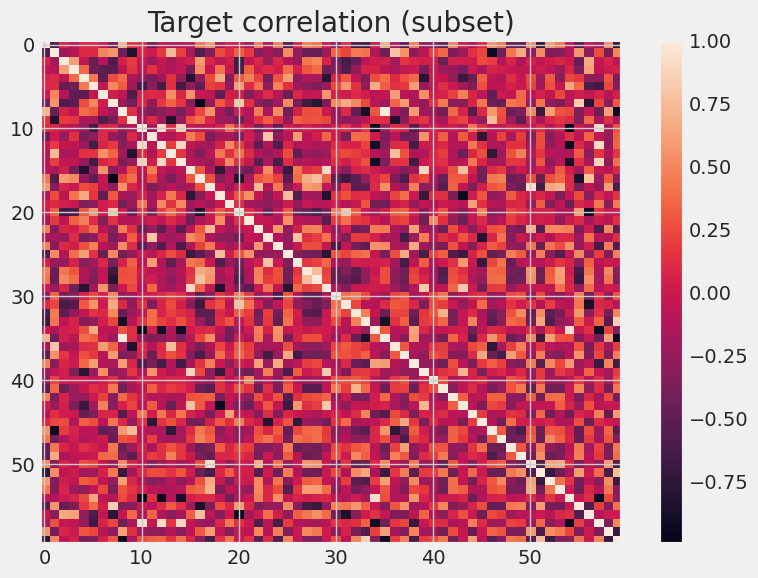

In [16]:
sub = train_labels_df.sample(frac=1.0, random_state=0)  # shuffle rows for stability
cols_sub = ["date_id"] + tgt_cols[:60]  # cap to 60 for readability
cm = sub[cols_sub].drop(columns=["date_id"]).corr()
plt.figure(figsize=(8,6))
plt.imshow(cm, aspect='auto', interpolation='nearest')
plt.colorbar(); plt.title("Target correlation (subset)")
plt.tight_layout(); plt.show()


In [17]:
print(test_df["is_scored"].value_counts(dropna=False))

# Are test dates the tail of train? (often true for the mock public test)
train_tail = train_df["date_id"].tail(test_df["date_id"].nunique())
print("Overlap count:", np.intersect1d(train_tail.values, test_df["date_id"].unique()).size)
print("Test date range:", test_df["date_id"].min(), "→", test_df["date_id"].max())


is_scored
True    90
Name: count, dtype: int64
Overlap count: 90
Test date range: 1827 → 1916


In [18]:
train_df.shape

(1917, 558)

In [19]:
import re

# === Select price-like columns (exclude Volume, open_interest) ===
cols = train_df.columns
price_like = [
    c for c in cols
    if re.search(r"(Close|close|Open|open|High|high|Low|low|Price|price|^FX_)", c)
    and not re.search(r"(Volume|volume|open_interest)", c)
]

# FX columns separately (to avoid missing High/Low substitutions)
fx_cols = [c for c in cols if c.startswith("FX_")]

# === Build feature matrix ===
lag_feat = 5   # number of lags
X = train_df[["date_id"]].copy()

# 1. Lagged log returns for price-like cols
for c in price_like:  # cap to avoid too many
    r1 = np.log(train_df[c] / train_df[c].shift(1))
    for k in range(1, lag_feat+1):
        X[f"{c}_logret_lag{k}"] = r1.shift(k)

# 2. Volatility features (High/Low ranges if available)
for c in price_like:
    if "Close" in c:  # try to match with High/Low
        base = c.replace("Close", "")
        high_col = base + "High"
        low_col = base + "Low"
        if high_col in train_df.columns and low_col in train_df.columns:
            vol = np.log(train_df[high_col] / train_df[low_col])
            for k in range(1, lag_feat+1):
                X[f"{base}range_vol_lag{k}"] = vol.shift(k)

# 3. Volume & open_interest (log1p + lags)
for c in cols:
    if "Volume" in c or "open_interest" in c:
        v1 = np.log1p(train_df[c])
        for k in range(1, lag_feat+1):
            X[f"{c}_lag{k}"] = v1.shift(k)

# 4. Rolling stats of returns (trend/volatility)
for c in price_like:
    r1 = np.log(train_df[c] / train_df[c].shift(1))
    X[f"{c}_ret_mean_5"] = r1.rolling(5).mean().shift(1)
    X[f"{c}_ret_std_5"] = r1.rolling(5).std().shift(1)

# 5. FX features (log returns with lags)
for c in fx_cols:
    r1 = np.log(train_df[c] / train_df[c].shift(1))
    for k in range(1, lag_feat+1):
        X[f"{c}_logret_lag{k}"] = r1.shift(k)

print("Feature matrix shape:", X.shape)
display(X.head(3))


# Align with labels on date_id
Y = train_labels_df.copy()
data = X.merge(Y, on="date_id", how="inner")
print("Feature matrix shape:", data.shape)
display(data.head(3))


Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-2271785691.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{c}_logret_lag{k}"] = r1.shift(k)
/tmp/ipython-input-2271785691.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{c}_logret_lag{k}"] = r1.shift(k)
/tmp/ipython-input-2271785691.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

Feature matrix shape: (1917, 3241)


/tmp/ipython-input-2271785691.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{c}_ret_mean_5"] = r1.rolling(5).mean().shift(1)
/tmp/ipython-input-2271785691.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{c}_ret_std_5"] = r1.rolling(5).std().shift(1)
/tmp/ipython-input-2271785691.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

,date_id,LME_AH_Close_logret_lag1,LME_AH_Close_logret_lag2,LME_AH_Close_logret_lag3,LME_AH_Close_logret_lag4,LME_AH_Close_logret_lag5,LME_CA_Close_logret_lag1,LME_CA_Close_logret_lag2,LME_CA_Close_logret_lag3,LME_CA_Close_logret_lag4,...,FX_NOKGBP_ret_mean_5,FX_NOKGBP_ret_std_5,FX_NOKCHF_ret_mean_5,FX_NOKCHF_ret_std_5,FX_ZARCHF_ret_mean_5,FX_ZARCHF_ret_std_5,FX_NOKJPY_ret_mean_5,FX_NOKJPY_ret_std_5,FX_ZARGBP_ret_mean_5,FX_ZARGBP_ret_std_5
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-0.01625,NaN,NaN,NaN,NaN,-0.008083,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Feature matrix shape: (1917, 3665)


,date_id,LME_AH_Close_logret_lag1,LME_AH_Close_logret_lag2,LME_AH_Close_logret_lag3,LME_AH_Close_logret_lag4,LME_AH_Close_logret_lag5,LME_CA_Close_logret_lag1,LME_CA_Close_logret_lag2,LME_CA_Close_logret_lag3,LME_CA_Close_logret_lag4,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,-0.01625,NaN,NaN,NaN,NaN,-0.008083,NaN,NaN,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706


In [20]:
X

,date_id,LME_AH_Close_logret_lag1,LME_AH_Close_logret_lag2,LME_AH_Close_logret_lag3,LME_AH_Close_logret_lag4,LME_AH_Close_logret_lag5,LME_CA_Close_logret_lag1,LME_CA_Close_logret_lag2,LME_CA_Close_logret_lag3,LME_CA_Close_logret_lag4,...,FX_NOKGBP_ret_mean_5,FX_NOKGBP_ret_std_5,FX_NOKCHF_ret_mean_5,FX_NOKCHF_ret_std_5,FX_ZARCHF_ret_mean_5,FX_ZARCHF_ret_std_5,FX_NOKJPY_ret_mean_5,FX_NOKJPY_ret_std_5,FX_ZARGBP_ret_mean_5,FX_ZARGBP_ret_std_5
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-0.016250,NaN,NaN,NaN,NaN,-0.008083,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.009826,-0.016250,NaN,NaN,NaN,0.005790,-0.008083,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-0.021337,0.009826,-0.016250,NaN,NaN,-0.009434,0.005790,-0.008083,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,-0.003018,-0.015745,0.015344,0.004024,0.025525,-0.013614,-0.003076,0.000729,0.008264,...,0.000063,0.004137,0.001191,0.007513,0.003139,0.008079,0.000117,0.009221,0.002009,0.008724
1913,1913,-0.012775,-0.003018,-0.015745,0.015344,0.004024,0.008012,-0.013614,-0.003076,0.000729,...,-0.000154,0.004018,0.000247,0.006594,-0.000485,0.006615,-0.001902,0.006545,-0.000887,0.009261
1914,1914,0.008737,-0.012775,-0.003018,-0.015745,0.015344,-0.000420,0.008012,-0.013614,-0.003076,...,0.000889,0.004183,-0.000770,0.006760,0.001100,0.004638,-0.002102,0.006382,0.002757,0.006881
1915,1915,0.000000,0.008737,-0.012775,-0.003018,-0.015745,0.001470,-0.000420,0.008012,-0.013614,...,0.001731,0.004685,0.000170,0.007270,-0.001143,0.003973,0.000074,0.005810,0.000420,0.006842


In [21]:
project_path = '/content/drive/MyDrive/mitsui_project/mitsui_project/data/'  # adjust path
data.to_csv(f"{project_path}final_data.csv", index=False)
X.to_csv(f"{project_path}X_data.csv", index=False)
Y.to_csv(f"{project_path}Y_data.csv", index=False)

In [22]:
X

,date_id,LME_AH_Close_logret_lag1,LME_AH_Close_logret_lag2,LME_AH_Close_logret_lag3,LME_AH_Close_logret_lag4,LME_AH_Close_logret_lag5,LME_CA_Close_logret_lag1,LME_CA_Close_logret_lag2,LME_CA_Close_logret_lag3,LME_CA_Close_logret_lag4,...,FX_NOKGBP_ret_mean_5,FX_NOKGBP_ret_std_5,FX_NOKCHF_ret_mean_5,FX_NOKCHF_ret_std_5,FX_ZARCHF_ret_mean_5,FX_ZARCHF_ret_std_5,FX_NOKJPY_ret_mean_5,FX_NOKJPY_ret_std_5,FX_ZARGBP_ret_mean_5,FX_ZARGBP_ret_std_5
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-0.016250,NaN,NaN,NaN,NaN,-0.008083,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.009826,-0.016250,NaN,NaN,NaN,0.005790,-0.008083,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-0.021337,0.009826,-0.016250,NaN,NaN,-0.009434,0.005790,-0.008083,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,-0.003018,-0.015745,0.015344,0.004024,0.025525,-0.013614,-0.003076,0.000729,0.008264,...,0.000063,0.004137,0.001191,0.007513,0.003139,0.008079,0.000117,0.009221,0.002009,0.008724
1913,1913,-0.012775,-0.003018,-0.015745,0.015344,0.004024,0.008012,-0.013614,-0.003076,0.000729,...,-0.000154,0.004018,0.000247,0.006594,-0.000485,0.006615,-0.001902,0.006545,-0.000887,0.009261
1914,1914,0.008737,-0.012775,-0.003018,-0.015745,0.015344,-0.000420,0.008012,-0.013614,-0.003076,...,0.000889,0.004183,-0.000770,0.006760,0.001100,0.004638,-0.002102,0.006382,0.002757,0.006881
1915,1915,0.000000,0.008737,-0.012775,-0.003018,-0.015745,0.001470,-0.000420,0.008012,-0.013614,...,0.001731,0.004685,0.000170,0.007270,-0.001143,0.003973,0.000074,0.005810,0.000420,0.006842


In [23]:
Y

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,NaN,NaN,-0.012519,-0.016896,NaN,...,NaN,0.036880,-0.015189,NaN,0.008118,0.001079,NaN,-0.015102,NaN,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,NaN,0.004937,NaN,-0.006673,-0.016105,-0.004885,NaN,NaN,0.009514,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,-0.012596,0.009309,0.007947,0.006477,-0.026216,-0.029487,-0.003287,0.011751,-0.027610,...,NaN,NaN,NaN,0.042052,NaN,NaN,NaN,NaN,0.031006,NaN
1913,1913,-0.000736,-0.001292,-0.005137,-0.007961,-0.008494,-0.011547,0.004263,0.005670,-0.004822,...,-0.012992,-0.003349,0.010912,0.006198,-0.009216,-0.003038,-0.026082,-0.008057,-0.002069,-0.141053
1914,1914,-0.002294,0.012898,0.009978,0.001567,0.002596,-0.007373,0.007554,0.002661,0.004083,...,-0.005240,0.004044,0.004459,0.002619,0.001308,-0.006772,-0.019918,-0.013304,-0.005527,-0.127688
1915,1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.008250,0.012842,0.009076,0.000932,0.011613,0.003825,0.024350,-0.006928,0.006805,-0.012187
